In [2]:
# 라이브러리 및 데이터 준비
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


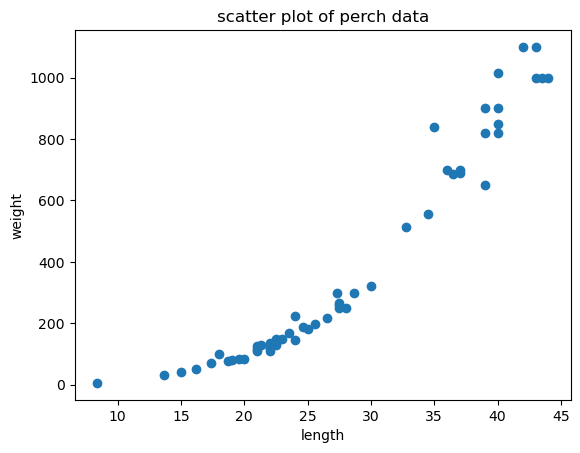

In [3]:
# 산점도를 통한 데이터 파악
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('scatter plot of perch data')
plt.show()


In [8]:
# 데이터 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(    perch_length, perch_weight, random_state=42)

In [ ]:
# 전치
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [ ]:
# 배열 바꾸기 (2x2)
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [ ]:
# reshape() 활용 -> 에러 발생 예시
# 원소의 개수가 기존과 다른 경우
test_array = test_array.reshape(2,3)  #ERROR

ValueError: cannot reshape array of size 4 into shape (2,3)

In [ ]:
# 배열 크기 자동 조정
# 크기에 -1을 지정할 경우 다른 채원을 채우고 남은 원소에 맞게 차원을 지정하라는 의미
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

# 배열의 전체 원소 개수 도출

(42, 1) (14, 1)


#### 결정계수 (R**)
k-nn 최근접 이웃 회귀 알고리즘을 구현
- KNeighborsRegressor
- KNeighborsClassifier

In [16]:
# 객체 생성 및 fit() method로 회귀 모델 훈련하기
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
print(knr.score(test_input, test_target))
# test 데이터 세트의 샘플을 정확하게 분류한 개수의 비율
# 결정계수 (R^2) = 

0.992809406101064


In [19]:
# mean_absolute_error
# 타깃과 예측의 절댓값 오차를 평균하여 반환
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 생성
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


-> 결과에서 예측이 평균적으로 19(g) 정도 타깃값과 다르다는 걸 알 수 있음.


#### 과대적합 /  과소적합

(if) 훈련 세트를 이용해 평가를 한다면?
     score() method에 훈련세트(train_input, train_target)을 전달

In [20]:
print(knr.score(train_input, train_target))

0.9698823289099254


##### 과대적합
 훈련세트 점수가 굉장히 좋았는데 / 테스트 세트에서는 점수가 굉장히 나쁨
#### 과소적합
훈련세트보다 테스트 세트의 점수가 높거나 두ㅜ 점수가 모두 낮은 경우
*과소적합이 일어나는 일반적인 경우*
훈련세트와 테스트 세트의 크기가 매우 작기 때문

#### k-최근접 이웃 회귀 평가 - k값에 따른 평가 적합성 비교


In [ ]:
# 이웃 개수 (k값) 3으로 설정
knr.n_neighbors = 3

# 모델 재훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


이전 훈련세트의 결정계수 값 = 0.9698823289099254
k값 변경 이후 훈련세트의 결정계수 값 = 0.9804899950518966

결정계수 값이 높아졌다는 걸 확인 가능함

In [22]:
#  테스트 세트의 점수(결정계수 값) 확인
print(knr.score(test_input, test_target))

0.9746459963987609


In [ ]:
# 테스트 세트 결정계수 < 훈련세트 결정계수
## => 과소적합 문제 해결!


## 03-2. 선형 회귀


- k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해
- 여러 가지 선형 회귀 모델 경험

In [4]:
# 라이브러리 및 데이터 준비
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [8]:
# 훈련세트와 테스트 세트 split
from sklearn.model_selection import train_test_split

train_input, test_input,train_target,test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 훈련 세트, 데이터 세트 2차원 배열로 바꾸기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [9]:
# k=3 인 k-최근접 이웃 회귀 모델 훈련

from sklearn.neighbors import KNeighborsRegressor

knr =KNeighborsRegressor(n_neighbors=3)

# k- 최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# 길이가 50cm인 농어의 무게 예측
print(knr.predict([[50]]))

# 근데 실제 무게가 훨씬 더 많이 나간대

[1033.33333333]


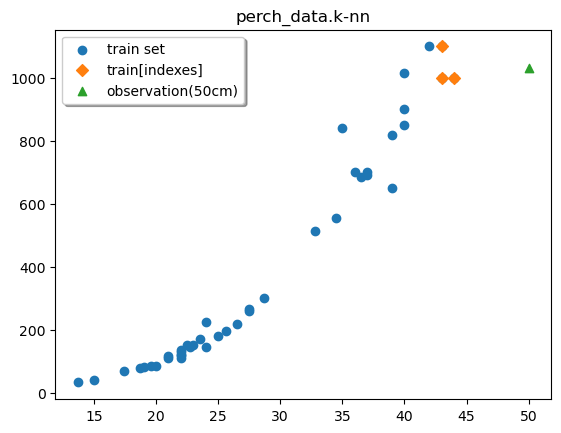

In [17]:
# perch_data(농어 데이터) / 훈련 세트와 50cm 농어, 농어의 최근접 이웃을 산점도로 표시
# 가장 가까운 이웃까지의 거리, 이웃 샘플의 인덱스 확인
import matplotlib.pyplot as plt

# 50cm 농어의 이웃 확인
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target, label='train set')
plt.scatter(train_input[indexes], train_target[indexes], marker='D', label='train[indexes]')

# 50cm 농어 데이터
plt.scatter(50,1033, marker='^', label='observation(50cm)')
plt.title('perch_data.k-nn')
# 제목에 한글을 쓰면 오류가 나여....
plt.legend(
    loc = 'upper left',
    shadow=True,
    frameon=True,
    ncol=1,
    fontsize='medium'
)


**상황,코드,의미**
- 특성 1개,[25],(X) 1차원 데이터! 라이브러리가 거부할 가능성 높음.
- 특성 1개,[[25]],(O) 1개의 샘플이 **1개의 특성(25)**을 가진 2차원 데이터.
- 특성 3개,"[[10, 20, 30]]",(O) 1개의 샘플이 3개의 특성을 가진 2차원 데이터.

In [ ]:
print(np.mean(train_target[indexes]))

 # k-최근접 이웃 알고리즘은 주변 이웃 샘플들의 무게를 평균함.
 # 그 때문에 새로운 샘플이 훈련세트의 범위를 벗어나게 되면 엉뚱한 값을 예측할 수 있음.

1033.3333333333333


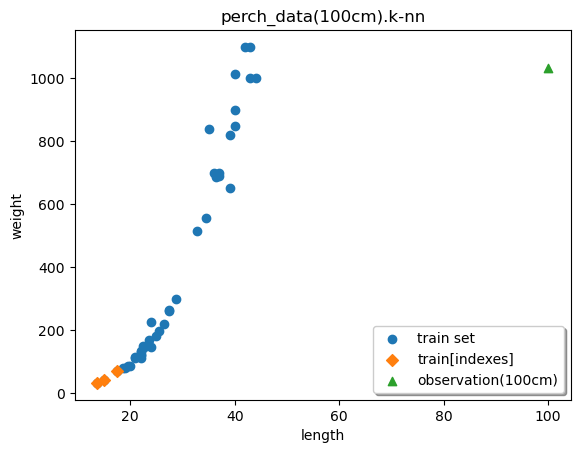

In [28]:
# 샘플이 완전히 훈련세트의 범위를 벗어난 경우
# 100cm 농어의 이웃 
distances, indexes = knr.kneighbors([[10]])

# 산점도로 비교해보기
# 훈련 세트 산점도
plt.scatter(train_input, train_target, label='train set')

# 이웃 샘플
plt.scatter(train_input[indexes], train_target[indexes], marker='D', label='train[indexes]')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker ='^', label='observation(100cm)')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('perch_data(100cm).k-nn')
plt.legend(
    loc ='lower right',
    shadow=True,
    frameon=True,
    ncol=1,
    fontsize='medium'
)

**Scatter plot _ marker 모양,문자열/기호,설명**
- .,.,포인트 마커 (Point)
- o,o,원 마커 (Circle)
- v,v,아래를 가리키는 삼각형 (Triangle down)
- ^,^,위를 가리키는 삼각형 (Triangle up)
- <,<,왼쪽을 가리키는 삼각형 (Triangle left)
- >,>,오른쪽을 가리키는 삼각형 (Triangle right)
- s,s,사각형 (Square)
- p,p,오각형 (Pentagon)
- *,*,별 (Star)
- h,h,육각형 (Hexagon 1)
- H,H,육각형 (Hexagon 2)
- +,+,플러스 기호 (Plus)
- x,x,X 기호 (X)
- D,D,다이아몬드 (Diamond)
- d,d,얇은 다이아몬드 (Thin Diamond)
- |,|,수직선 (Vertical line)
- _,_,수평선 (Horizontal line)